# Linear Regression

## 1. Linear Regression

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Read data
df = pd.read_csv('/gdrive/My Drive/Data/linear_regression.csv')

In [0]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


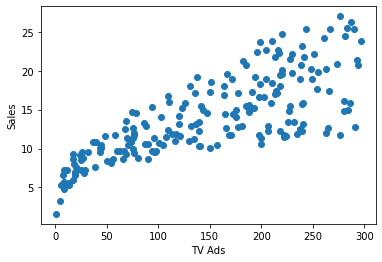

In [0]:
# Plot the relationship between TV Ads and Sales
plt.scatter(x = df['TV'], y = df['Sales'])
plt.xlabel('TV Ads')
plt.ylabel('Sales')
plt.show()

In [0]:
# Let's have just one predictor variable: TV for now
X = df[['TV']].to_numpy()
y = df['Sales'].to_numpy().reshape((-1, 1))

__Standardization__

To address this issue, we want to __scale__ the variables of our data.

One approach of scaling is called __Standardization__. Formula:

$$x'=\frac {x-\bar x}{\sigma}$$

By standardizing, we redistribute the variables to their $\mu = 0$ and $\sigma = 1$. This will significantly improve the training process as all features are now in the same scale.

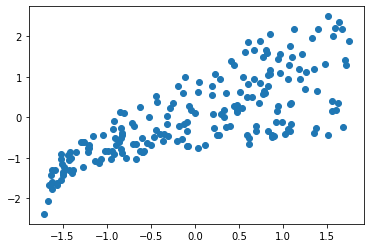

In [0]:
# Standardization
X_mean = np.mean(X)
X_std = np.std(X)
y_mean = np.mean(y)
y_std = np.std(y)

X = (X - X_mean) / X_std
y = (y - y_mean) / y_std

# Our data after scaling
plt.scatter(X, y)
plt.show()

### Simple Linear Regresion

#### __Linear Equation__
$$ \hat y = b + wx$$

- $b$ (or $b_0$): bias (or constant, intercept)
- $w$ (or $b_1$): weight (or coefficient)

In [0]:
# Create a Linear Regression model to predict a continuous output (y) using given input (X)
def predict(X, w, b):
  y = b + w * X

  return y

Shape of w: (1, 1)
Shape of b: (1, 1)
Shape of X: (200, 1)
Shape of y_hat: (200, 1)


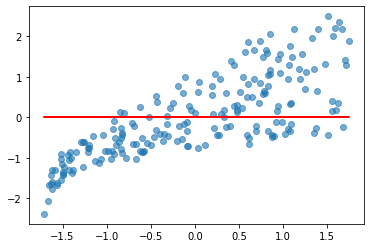

In [0]:
# Let's initialize our model as y = 0
w = np.zeros((1, 1))
b = np.zeros((1, 1))

y_hat = predict(X, w, b) 

print(f"Shape of w: {w.shape}")
print(f"Shape of b: {b.shape}")
print(f"Shape of X: {X.shape}")
print(f"Shape of y_hat: {y_hat.shape}")

# Plot the model
plt.scatter(X, y, alpha=0.6)
plt.plot(X, y_hat, c='r')

plt.show()

#### __Error(Lost) Function: Mean Squared Error__

The Error (Lost) Function of our model tells us how "wrong" the model is.
__Mean Squared Error__ is the error function used for linear regression.

$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y - \hat y)^2$$

In [0]:
# Calculate the mean squared error of the model
def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

print(f"MSE of our initial model: {mse(y, y_hat)}")

MSE of our initial model: 1.0


#### __Minimizing Error Function: Gradient Descent Algorithm__

The __Gradient Descent__ algorithm minimizes the result of the error function.
> __Gradient descent__ is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient.

![](https://ml-cheatsheet.readthedocs.io/en/latest/_images/gradient_descent.png)

![](https://miro.medium.com/max/1400/0*fU8XFt-NCMZGAWND.)

__Formula:__

- General:
$$\theta_j := \theta_j - \alpha \frac {\partial}{\partial \theta_j}J_\theta$$

  - $\theta_j$: parameter ($w$, $b_1$, $b_2$,...$b_n$)
  - $\alpha$: learning rate
  - $J_\theta$: error function with parameter $\theta_j$

__This process is repreated until convergence.__

- Partial Derivative of $b$:

$$ \frac {\partial}{\partial \theta_b}J_\theta = \frac {-2}{m}\sum_{i=1}^{n}(y_i-\hat y_i) $$

- Partial Derivative of $w$

$$ \frac {\partial}{\partial \theta_w}J_\theta = \frac {-2}{m}\sum_{i=1}^{n}x_i(y_i-\hat y_i) $$
<br>


In [0]:
# Learning rate
alpha = 0.01 

# Number of rows (observations)
m = X.shape[0] 

In [0]:
# Initialize our model as y = 0
w = np.zeros((1, 1))
b = np.zeros((1, 1))

# Predicting y_hat with our model
# This step is called Forward Propagation
y_hat = predict(X, w, b) 

In [0]:
# Change w and b to reduce error function using Gradient Descent
# This step is called Backward Propagation
def backward_():
    global y_hat, w, b
    db = 0
    dw = 0

    for i in range(m):
      db += -2 * (y[i] - (X[i]*w + b))
      dw += -2 * X[i] * (y[i] - (X[i]*w + b))

    b = b - (db / m) * alpha
    w = w - (dw / m) * alpha

    y_hat = predict(X, w, b)

    return mse(y, y_hat)

In [0]:
# Let's test it out
print(f"Coef: {w}")
print(f"Intercept: {b}")
print(f"MSE: {backward()}")

Coef: [[0.04600105]]
Intercept: [[-9.9475983e-18]]
MSE: 0.9086856168535192


In [1]:
# Vectorization is much faster.
# The Backward Propagation function using numpy
def backward():
    global y_hat, w, b

    dw = (-2/m) * (np.dot(X.T, (y - y_hat)))
    db = (-2/m) * np.sum(y - y_hat, keepdims = True)

    w = w - (alpha * dw)
    b = b - (alpha * db)

    # Forward propagation
    y_hat = np.dot(X, w) + b

    return mse(y, y_hat)

In [0]:
# Number of time we will repreat the gradient descent process
iterations = 1000

# Create a list containing the mse after each interation
mse_list = []

MSE: 0.388124949149929
b: [[-2.77555756e-16]]
w: [[0.78222442]]


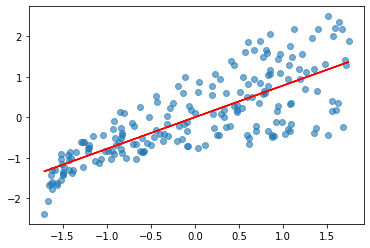

In [0]:
# Train (Fit) our model
for i in range(iterations):
  mse_list.append(mse(y, y_hat))
  backward()

print(f"MSE: {mse_list[-1]}")
print(f"b: {b}")
print(f"w: {w}")

# Plot our model after training
plt.scatter(X, y, alpha = 0.6)
plt.plot(X, y_hat, c='r')

plt.show()

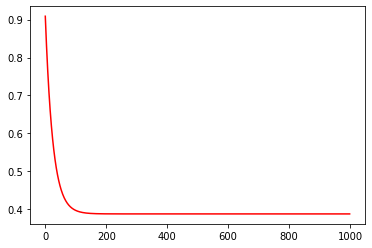

In [0]:
# Plot the change in mse during the traing process
plt.plot(list(range(len(mse_list))), mse_list, c = 'r')
plt.show()

In [0]:
# Animate the training process
from matplotlib import animation, rc
rc('animation', html='jshtml')
%matplotlib inline

# Re-initialize the parameters
w = np.zeros((1, 1))
b = np.zeros((1, 1))

y_hat = predict(X, w, b)

fig, ax = plt.subplots()

plt.scatter(X, y, alpha=0.7)
line, = plt.plot(X, y_hat, c='r')
text = ax.text(20, 0, 'MSE %f, w=%f, b=%f' % (mse(y, y_hat), w, b))

plt.close()

costs = []
def animate(i):
    costs.append(backward())
    line.set_ydata(y_hat)
    text.set_text('MSE %f, w=%f, b=%f' % (mse(y, y_hat), w, b))
    return line,

anim = animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=100, blit=True)
anim

## Multiple Linear Regression

### From Scratch
A Multiple Linear Regression model has many predictor variables (features).

#### __Linear Equation__
$$ y = b + w_1x_1 + w_2x_2 + ... + w_nx_n$$

- $b$ (or $b_0$): bias (or constant, intercept)
- $w_n$ (or $b_n$): weight (or coefficient)

In [0]:
# Initialize parameters
m = X.shape[0] # Number of row (observations)
n = X.shape[1] # Number of column (features)

w = np.zeros((n, 1))
b = np.zeros((1, 1))

alpha = 0.01

y_hat = np.dot(X, w) + b

print(f"Shape of X: {X.shape}")
print(f"Shape of w: {w.shape}")
print(f"Shape of b: {b.shape}")
print(f"Shape of y_hat: {y_hat.shape}")

Shape of X: (200, 3)
Shape of w: (3, 1)
Shape of b: (1, 1)
Shape of y_hat: (200, 1)


In [0]:
# Standardization
X_mean = np.mean(X)
X_std = np.std(X)
y_mean = np.mean(y)
y_std = np.std(y)

X = (X - X_mean) / X_std
y = (y - y_mean) / y_std

In [0]:
# Backward Propagation
def backward():
    global y_hat, w, b

    dw = (-2/m) * (np.dot(X.T, (y - y_hat)))
    db = (-2/m) * np.sum(y - y_hat, keepdims = True)

    w = w - (alpha * dw)
    b = b - (alpha * db)

    # Forward propagation
    y_hat = np.dot(X, w) + b

    return mse(y, y_hat)

In [0]:
# Let's test it out
print(f"Coef: {w}")
print(f"Intercept: {b}")
print(f"MSE: {backward()}")

Coef: [[0.]
 [0.]
 [0.]]
Intercept: [[0.]]
MSE: 73850803.95680553


In [0]:
# Wrap up to whole process!
class LinearRegression():
  def __init__(self, alpha, iterations):
    self.alpha = alpha
    self.iterations = iterations

  def fit(self, X, y):
    self.m = X.shape[0]
    self.n = X.shape[1]
    self.w = np.zeros((self.n, 1))
    self.b = np.zeros((1, 1))
    self.X = X
    self.y = y
    self.y_hat = np.dot(X, self.w) + self.b

    for i in range(self.iterations):
      self.backward()

  def mse(self, y, y_hat):
    return np.mean((y - y_hat) ** 2)

  def backward(self):

    dw = (-2/self.m) * (np.dot(self.X.T, (self.y - self.y_hat)))
    db = (-2/self.m) * np.sum(self.y - self.y_hat, keepdims = True)

    self.w = self.w - (self.alpha * dw)
    self.b = self.b - (self.alpha * db)

    # Forward propagation
    self.y_hat = np.dot(self.X, w) + self.b

    return self.mse(self.y, self.y_hat)

  def predict(self, X):
    return np.dot(X, self.w) + self.b

In [0]:
# Test the model
model = LinearRegression(alpha = 0.000001, iterations = 200000)

model.fit(X, y)

print(f'Coef: {model.w}')
print(f'Intercept: {model.b}')
print(f'MSE: {mean_squared_error(y, model.predict(X))}')

In [3]:
!pip install gradient
# # # Loss function = half-MSE # # #
# # parameters
# y = original values of target variable
# yhat = predicted values of target variable
def loss(y, yhat):
	se = round(sum([(yhat[i] - y[i])**2 for i in range(len(y))]), 6)
	mse = se/(2.0 * len(y))
	return mse

# # # derivative function of theta0 # # #
# # parameters
# y = original values of target variable
# yhat = predicted values of target variable
def derivative1(y, yhat):
	d = sum([yhat[i] - y[i] for i in range(len(y))])
	d = d / float(len(y))
	return(d)

# # # derivative function of theta1 # # #
# # parameters
# y = original values of target variable
# yhat = predicted values of target variable
# x = list of independent data values in the data
def derivative2(y, yhat, x):
	d = sum([((yhat[i] - y[i]) * x[i]) for i in range(len(y))])
	d = d / float(len(y))
	return(d)

# # # A function that calculates the derivative change with learning rate # # #
# # parameters
# x = list of lists of independent feature values in the data
# y = original values of target variable
# yhat = predicted values of target variable
# params = parameters that needs optimization
# learning_rate = learning_rate to proceed with the gradient
def derivatives(x, y, yhat, params, learning_rate, complex = False):
	d1 = derivative1(y, yhat)
	d2 = derivative2(y, yhat, x)
	if complex:
		d1 = float(d1)/max(d1, d2)
		d2 = float(d2)/max(d1, d2)
	params['theta0'] = round(params['theta0'] - learning_rate * d1, 4)
	params['theta1'] = round(params['theta1'] - learning_rate * d2, 4)
	return(params)


# # # A function that calculates y value given x and params # # #
# # parameters
# x = list of lists of independent feature values in the data
# params = parameters that needs optimization
def yEQ(x, params):
	return [(params['theta0'] + (i * params['theta1'])) for i in x]

from gradient import iterLearningRate, vanilla_gradient_descent

# # # formulate original 'y' i.e. y = 3 + 2*x (i.e. theta0 + theta1 * x)
x = range(1, 10)
y = yEQ(x, params = {'theta0' : 3, 'theta1' : 2})

print (vanilla_gradient_descent(x, y, params = {'theta0' : 0, 'theta1' : 0}, derivatives = derivatives, force = True, learning_rate = 0.1, yEQ = yEQ, loss = loss, adaptive = True))
print (iterLearningRate(x, y, params = {'theta0' : 0, 'theta1' : 0}, derivatives = derivatives, yEQ = yEQ, force = True, loss = loss, adaptive = True, plot_flag = False))


ImportError: cannot import name 'iterLearningRate' from 'gradient' (/Users/nguyetvo/opt/anaconda3/lib/python3.7/site-packages/gradient/__init__.py)